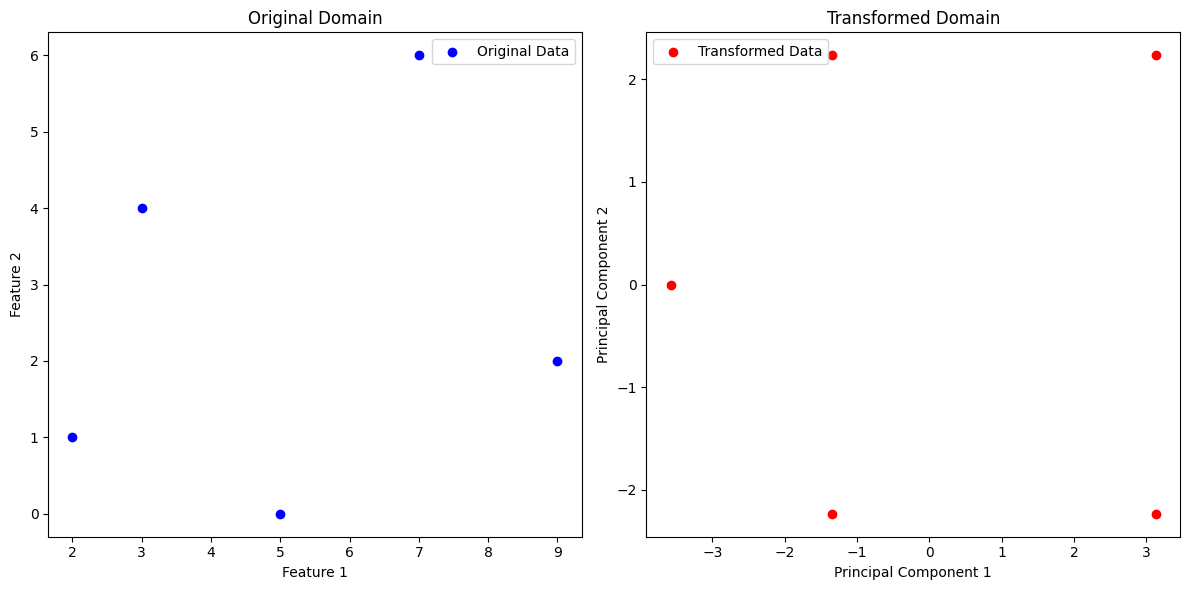

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D dataset
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

# Step 1: Calculate the mean of the data
mean = np.mean(data, axis=0)

# Step 2: Subtract the mean from the data
centered_data = data - mean

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Step 4: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Transform the data into the new feature space
transformed_data = np.dot(centered_data, eigenvectors)

# Plot the scatter plot of data points in both original and transformed domains
plt.figure(figsize=(12, 6))

# Original domain
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Domain')
plt.legend()

# Transformed domain
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Domain')
plt.legend()

plt.tight_layout()
plt.show()


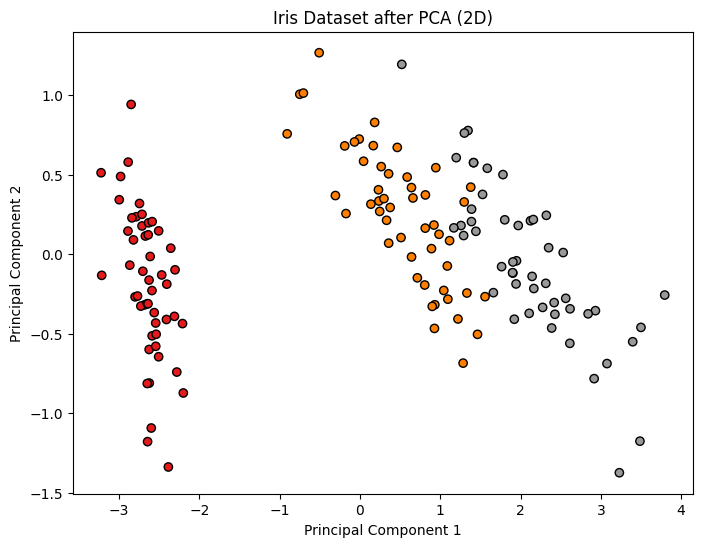

In [3]:
# Load Iris dataset
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# PCA implementation
def pca(X, n_components=2):
    # Step 1: Calculate the mean of the data
    mean = np.mean(X, axis=0)

    # Step 2: Subtract the mean from the data
    centered_data = X - mean

    # Step 3: Compute the covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Step 4: Compute the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Take the top n_components eigenvectors
    eigenvectors = eigenvectors[:, :n_components]

    # Step 5: Transform the data into the new feature space
    transformed_data = np.dot(centered_data, eigenvectors)

    return transformed_data

# Apply PCA to reduce dimensions to 2D
X_transformed = pca(X, n_components=2)

# Plot the scatter plot for samples in the transformed domain with different color codes for samples belonging to different classes
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset after PCA (2D)')
plt.show()
